In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

from xgboost import XGBClassifier


In [2]:
import pandas as pd

file_path = r"C:\Users\lavan\OneDrive\Desktop\ad_table.csv"  # Adjust the path as needed

try:
    data = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(data.head())
except PermissionError:
    print("Permission Denied: Check if the file is open or if you have the correct permissions.")
except FileNotFoundError:
    print("File Not Found: Double-check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


File loaded successfully!
         date  shown  clicked  converted  avg_cost_per_click  total_revenue  \
0  2015-10-01  65877     2339         43                0.90         641.62   
1  2015-10-02  65100     2498         38                0.94         756.37   
2  2015-10-03  70658     2313         49                0.86         970.90   
3  2015-10-04  69809     2833         51                1.01         907.39   
4  2015-10-05  68186     2696         41                1.00         879.45   

           ad  
0  ad_group_1  
1  ad_group_1  
2  ad_group_1  
3  ad_group_1  
4  ad_group_1  


In [4]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the path to your CSV file
file_path = r'C:\Users\lavan\OneDrive\Desktop\ad_table.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the data
print(data.head())

# Display basic information about the DataFrame
print(data.info())

# Optional: Check for missing values in the dataset
print(data.isnull().sum())

# Optional: Display basic statistics for numerical columns
print(data.describe())


         date  shown  clicked  converted  avg_cost_per_click  total_revenue  \
0  2015-10-01  65877     2339         43                0.90         641.62   
1  2015-10-02  65100     2498         38                0.94         756.37   
2  2015-10-03  70658     2313         49                0.86         970.90   
3  2015-10-04  69809     2833         51                1.01         907.39   
4  2015-10-05  68186     2696         41                1.00         879.45   

           ad  
0  ad_group_1  
1  ad_group_1  
2  ad_group_1  
3  ad_group_1  
4  ad_group_1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2115 non-null   object 
 1   shown               2115 non-null   int64  
 2   clicked             2115 non-null   int64  
 3   converted           2115 non-null   int64  
 4   avg_cost_per_click  2115

In [5]:
# Load your CSV
df = pd.read_csv(r'C:\Users\lavan\OneDrive\Desktop\ad_table.csv')  # Replace with your actual file path

# Initial inspection
print(df.head())
print(df.info())
print(df.describe())


         date  shown  clicked  converted  avg_cost_per_click  total_revenue  \
0  2015-10-01  65877     2339         43                0.90         641.62   
1  2015-10-02  65100     2498         38                0.94         756.37   
2  2015-10-03  70658     2313         49                0.86         970.90   
3  2015-10-04  69809     2833         51                1.01         907.39   
4  2015-10-05  68186     2696         41                1.00         879.45   

           ad  
0  ad_group_1  
1  ad_group_1  
2  ad_group_1  
3  ad_group_1  
4  ad_group_1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2115 non-null   object 
 1   shown               2115 non-null   int64  
 2   clicked             2115 non-null   int64  
 3   converted           2115 non-null   int64  
 4   avg_cost_per_click  2115

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

from xgboost import XGBClassifier


date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad                    0
dtype: int64


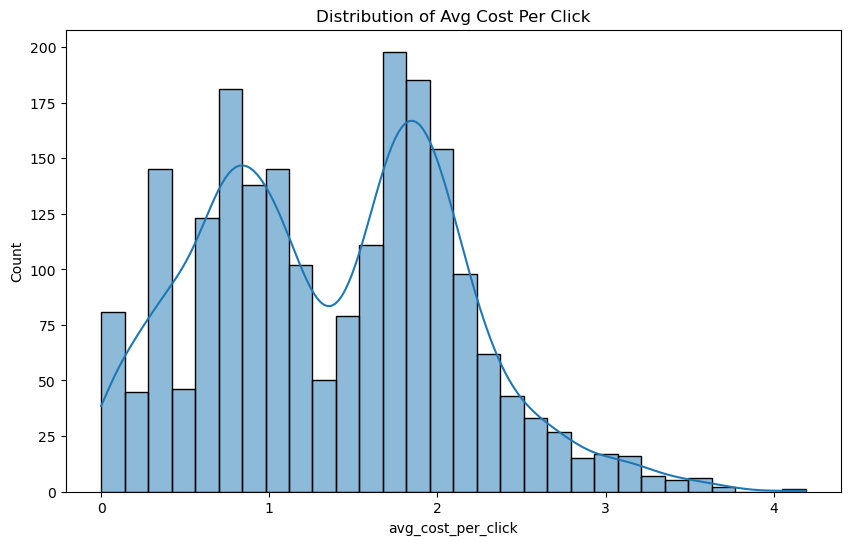

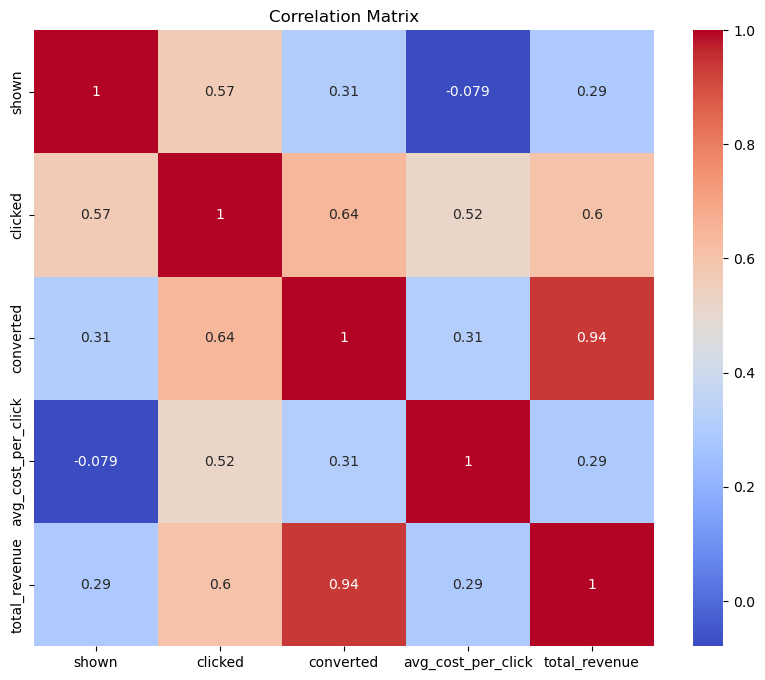

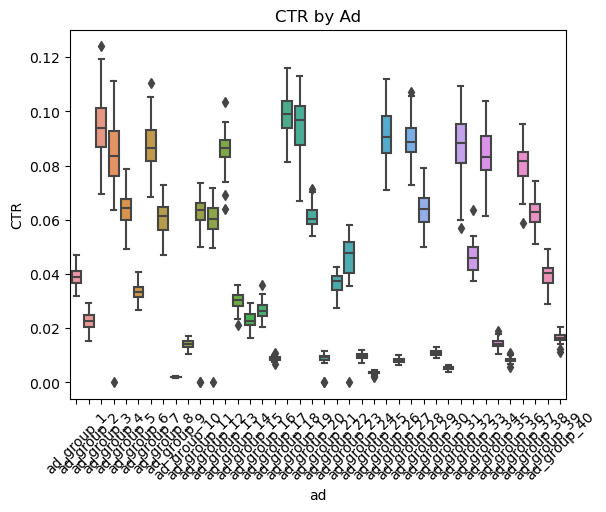

In [7]:
# Check missing values
print(df.isnull().sum())

# Plot distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_cost_per_click'], bins=30, kde=True)
plt.title('Distribution of Avg Cost Per Click')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Click Through Rate (CTR) and Conversion Rate (CR)
df['CTR'] = df['clicked'] / df['shown']
df['CR'] = df['converted'] / df['clicked'].replace(0, np.nan)

# Plot CTR by Ad
sns.boxplot(data=df, x='ad', y='CTR')
plt.title('CTR by Ad')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Make a copy to avoid altering original
df_fe = df.copy()

# 1. ---- DATE Features ----
df_fe['date'] = pd.to_datetime(df_fe['date'])  # Convert to datetime
df_fe['Day'] = df_fe['date'].dt.day
df_fe['Month'] = df_fe['date'].dt.month
df_fe['Weekday'] = df_fe['date'].dt.weekday
df_fe['Is_Weekend'] = df_fe['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# 2. ---- Engagement Rates ----
df_fe['CTR'] = df_fe['clicked'] / df_fe['shown'].replace(0, np.nan)  # Click-through rate
df_fe['CR'] = df_fe['converted'] / df_fe['clicked'].replace(0, np.nan)  # Conversion rate
df_fe[['CTR', 'CR']] = df_fe[['CTR', 'CR']].fillna(0)  # Fill NaNs caused by 0 division

# 3. ---- Revenue & Cost Derived Features ----
df_fe['Total_cost'] = df_fe['clicked'] * df_fe['avg_cost_per_click']
df_fe['Profit'] = df_fe['total_revenue'] - df_fe['Total_cost']
df_fe['ROI'] = df_fe['Profit'] / df_fe['Total_cost'].replace(0, np.nan)
df_fe['ROI'] = df_fe['ROI'].fillna(0)

# 4. ---- Encode 'Ad' column ----
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_fe['Ad_encoded'] = label_encoder.fit_transform(df_fe['ad'].astype(str))

# 5. ---- Binary Target Variable ----
# We assume 'Converted' > 0 implies a successful conversion
df_fe['Target'] = df_fe['converted'].apply(lambda x: 1 if x > 0 else 0)

# 6. ---- Drop Unused Columns ----
df_model = df_fe.drop(columns=['date', 'ad', 'converted'])  # Keep 'Target' instead

# Ready for modeling
X = df_model.drop(columns=['Target'])
y = df_model['Target']

# Show the final engineered dataset
df_model.head()

print(df_model.head())

print("Features ready for modeling:", X.columns.tolist())
print("Target value distribution:\n", y.value_counts())


   shown  clicked  avg_cost_per_click  total_revenue       CTR        CR  Day  \
0  65877     2339                0.90         641.62  0.035506  0.018384    1   
1  65100     2498                0.94         756.37  0.038372  0.015212    2   
2  70658     2313                0.86         970.90  0.032735  0.021185    3   
3  69809     2833                1.01         907.39  0.040582  0.018002    4   
4  68186     2696                1.00         879.45  0.039539  0.015208    5   

   Month  Weekday  Is_Weekend  Total_cost   Profit       ROI  Ad_encoded  \
0     10        3           0     2105.10 -1463.48 -0.695207           0   
1     10        4           0     2348.12 -1591.75 -0.677883           0   
2     10        5           1     1989.18 -1018.28 -0.511909           0   
3     10        6           1     2861.33 -1953.94 -0.682878           0   
4     10        0           0     2696.00 -1816.55 -0.673795           0   

   Target  
0       1  
1       1  
2       1  
3       

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ---- 1. Define Features (X) and Target (y) ----
X = df_model.drop(columns=['Target'])
y = df_model['Target']

# ---- 2. Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ---- 3. Scale the Features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- 4. Confirm Shapes and Sample ----
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train distribution:\n", y_train.value_counts())


X_train shape: (1480, 14)
X_test shape: (635, 14)
y_train distribution:
 Target
1    1430
0      50
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ---- 1. Feature/Target Split ----
X = df_model.drop(columns=['Target'])
y = df_model['Target']

# ---- 2. Make sure X has only numeric types ----
X = X.select_dtypes(include=[np.number])

# ---- 3. Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ---- 4. Scale the Features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- 5. Check shapes and sanity ----
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train distribution:\n", y_train.value_counts())


X_train shape: (1480, 14)
X_test shape: (635, 14)
y_train distribution:
 Target
1    1430
0      50
Name: count, dtype: int64


C:\Users\lavan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:04:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00       613

    accuracy                           1.00       635
   macro avg       1.00      1.00      1.00       635
weighted avg       1.00      1.00      1.00       635

Confusion Matrix:
[[ 22   0]
 [  0 613]]


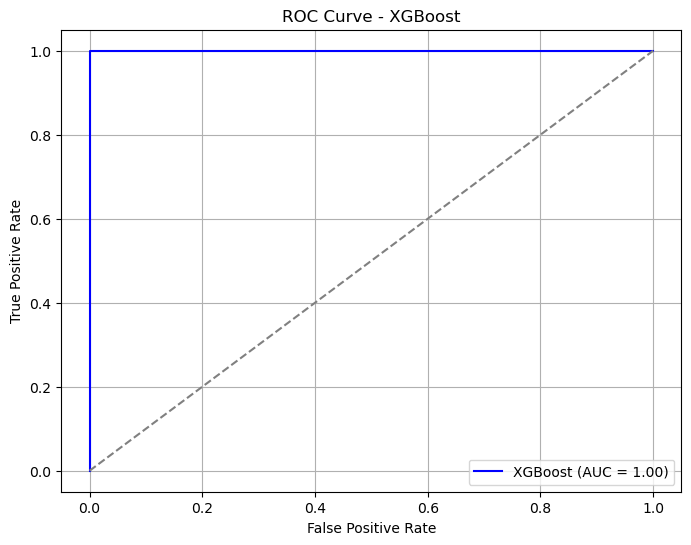

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

# ---- 1. Initialize and Train the Model ----
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# ---- 2. Predict and Evaluate ----
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC

# ---- 3. Classification Report ----
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ---- 4. Confusion Matrix ----
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ---- 5. ROC Curve ----
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\lavan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:05:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00       613

    accuracy                           1.00       635
   macro avg       1.00      1.00      1.00       635
weighted avg       1.00      1.00      1.00       635

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


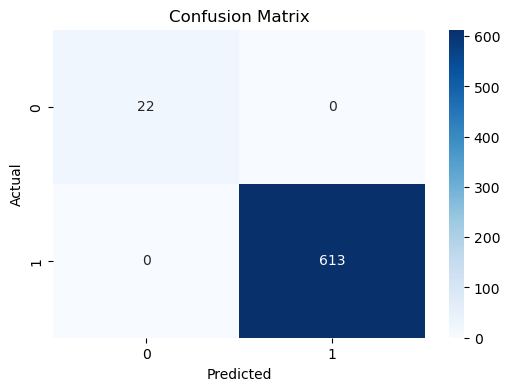

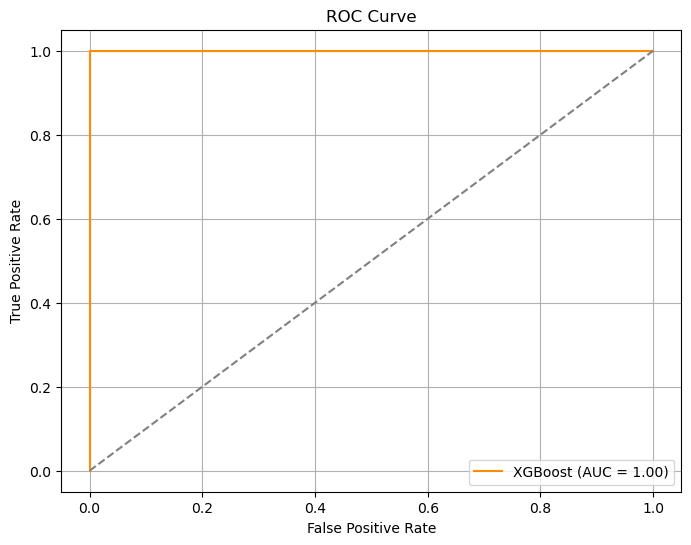

In [15]:
# Import required libraries
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1. Initialize and Train the Model ----
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# ---- 2. Predict on Test Set ----
y_pred = xgb_model.predict(X_test_scaled)
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]  # For ROC

# ---- 3. Print Evaluation Metrics ----
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# ---- 4. Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---- 5. ROC Curve and AUC ----
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
